
# <center> Семинар 3

## <center> Cпециализированные библиотеки Python для численных методов и анализа данных. 
## <center> Библиотека SciPY. Решение дифференциальных уравнений с помощью Python. 
    
  

# SciPy - Library of scientific algorithms for Python

SciPy — это открытая библиотека высококачественных научных инструментов для языка программирования Python. SciPy содержит модули для оптимизации, интегрирования, специальных функций, обработки сигналов, обработки изображений, генетических алгоритмов, решения обыкновенных дифференциальных уравнений, и других задач обычно решаемых в науке и при инженерной разработке. 

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

## Литература по SciPy

- http://www.scipy.org - The official web page for the SciPy project.
- http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy.
- https://github.com/scipy/scipy/ - The SciPy source code.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
from scipy import *

In [5]:
import scipy.linalg as la

## Специальные функции

Приведем пример использования модуля специальных функций на примере функции Бесселя. 

In [12]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [13]:
n = 0    # порядок
x = 0.0

# функция Бесселя первого рода
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# функция Бесселя второго рода
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


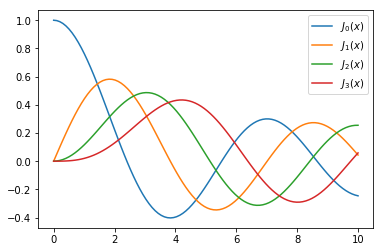

In [14]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

## Обыкновенные дифференциальные уравнения

SciPy предоставляет две возможности для решения ОДУ: API основанное на функции `odeint` и объектно-ориентированное API, основанное на классе `ode`. Обычно `odeint` более прост в использовании и подходит для знакомства с пакетом, в то время как класс `ode` дает большие возможности для настройки.  

In [15]:
from scipy.integrate import odeint, ode

Система обыкновенных дифференциальных уравнений в стандартном виде обычно записывается так:

$y' = f(y, t)$

где

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

и  $f$ - это это некоторая функция которая равно производной функции $y_i(t)$. Для решения ОДУ мы должны знать правую часть $f$ и начальные условия $y(0)$.

Когда мы задали функцию `f`  и вектор `y_0` - мы можем использовать функцию `odeint`:

    y_t = odeint(f, y_0, t)


### Пример: двойной маятник

Возьмем в качестве примера движение двойного маятника, подробно описанное здесь https://ru.wikipedia.org/wiki/Двойной_маятник

In [27]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Уравнения движения для маятника зписываются следующим образом:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Для того, чтобы сделать код на Python проще, введем новую переменную $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [28]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [18]:
# задание начальных условий
x0 = [pi/4, pi/2, 0, 0]

In [19]:
x0

[0.7853981633974483, 1.5707963267948966, 0, 0]

In [20]:
# задание сетки по времени
t = linspace(0, 10, 250)

In [22]:
# решение системы
x = odeint(dx, x0, t)

In [23]:
x.shape

(250, 4)

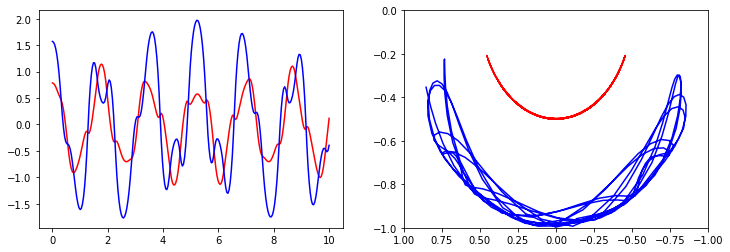

In [26]:
# построим углы в зависимости от времени

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

## Линейная алгебра

Модуль линейной алгебры включает множество операций, связанных с матрицами, включая методы для решения систем линейных уравнений, нахождения собственных значений, разложение матриц (например сингулярное разложение, LU-разложение). 

Документация: http://docs.scipy.org/doc/scipy/reference/linalg.html

Сейчас мы рассмотрим лишь несколько примеров использования таких функций:


### Системы линейных уравнений

Система линейных уравнений в матричном видел

$A x = b$

где $A$ это матрица и $x,b$ вектора, можно решить с помощью следующего метода:

In [34]:
from scipy.linalg import *
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [35]:
x = solve(A, b)

x

/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.20282346156e-18 / 1.11022302463e-16
  RuntimeWarning)


array([-0.23333333,  0.46666667,  0.1       ])

In [36]:
# проверка
dot(A, x) - b

array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

То же самое можем сделать в случае, если $A, B, X$ - матрицы: 

$A X = B$

In [37]:
A = rand(3,3)
B = rand(3,3)

In [38]:
X = solve(A, B)

In [39]:
# проверка
norm(dot(A, X) - B)

1.4686870114880517e-16

## Разреженные матрицы


При численном моделировании различных больших физических систем приходится столкнуться с матрицами больших размеров, содержащих преимущественно нули. SciPy умеет хорошо выполнять базовые операции линейной алгебры с такими матрицами.

Существует несколько возможных стратегий для эффективного хранения разреженной матрицы. Самые распространенные это - хранение в координатной форме, в формате списка списков (LIL) , разреженный строчный формат и другие. Каждый способ имеет свои достоинства и недостатки. Большинство вычислительных алгоритмов (решение уравнений, умножение матрицы на матрицу) могут быть эффективно выполнены используя разреженный строчный или столбцовый формат, однако они достаточно сложно реализуемы на практике. Поэтому часто разреженная матрица инициализируется в координатном или LIL формате, а затем преобразуется в разреженный строчный или столбцовый формат для проведения вычислений.

Когда мы создаем разряженную матрицу, мы должны выбрать в каком формате она будет храниться. Например,

In [57]:
from scipy.sparse import *

In [58]:
# плотная матрица
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [59]:
# делаем из плотной разряженную
A = csr_matrix(M); 
A

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [60]:
# делаем из разряженной плотную
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

Наиболее эффективный способ создать разреженную матрицу: инициализировать пустую матрицу и заполнить ее используя индексирование (это поможет избежать создания больших плотных матриц)

In [61]:
A = lil_matrix((4,4)) # пустая 4x4 разряженная матрица
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [62]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [63]:
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [64]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [65]:
\
A = csc_matrix(A); A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [66]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

## Интерполяция

Интерполяция в SciPy выполняется очень легко и удобно: функция `interp1d`, при подаче ей в качестве входных данных вектора X и Y, объект, который ведет себя как функция, которая может быть вызвана для произвольного значения x (в диапазоне, охватываемом X), и возвращает соответствующее интерполированное значение y:

In [67]:
from scipy.interpolate import *

In [68]:
def f(x):
    return sin(x)

In [69]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # симулируем измерения с шумом
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

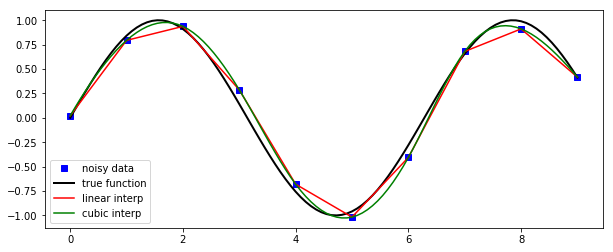

In [70]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);